# İş problemi;

- Kradi scoru ve buna bağlı kredi risk skorunu etkileyen faktörler nelerdir.

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv(r"C:\Users\realb\Desktop\Kişilerin finansal risk hesaplama raporu\data\financial_risk_assessment.csv")

### Veriye ilk bakış

In [3]:
df.head()

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
0,49,Male,PhD,Divorced,72799.0,688.0,45713.0,Business,Unemployed,19,Poor,0.154313,120228.0,0.0,Port Elizabeth,AS,Cyprus,2.0,2,Low
1,57,Female,Bachelor's,Widowed,NaN,690.0,33835.0,Auto,Employed,6,Fair,0.148920,55849.0,0.0,North Catherine,OH,Turkmenistan,3.0,2,Medium
2,21,Non-binary,Master's,Single,55687.0,600.0,36623.0,Home,Employed,8,Fair,0.362398,180700.0,3.0,South Scott,OK,Luxembourg,3.0,2,Medium
3,59,Male,Bachelor's,Single,26508.0,622.0,26541.0,Personal,Unemployed,2,Excellent,0.454964,157319.0,3.0,Robinhaven,PR,Uganda,4.0,2,Medium
4,25,Non-binary,Bachelor's,Widowed,49427.0,766.0,36528.0,Personal,Unemployed,10,Fair,0.143242,287140.0,NaN,New Heather,IL,Namibia,3.0,1,Low


In [4]:
df.tail()

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
14995,23,Non-binary,Bachelor's,Widowed,48088.0,609.0,26187.0,Home,Self-employed,2,Fair,0.317633,NaN,4.0,Susanstad,TN,Djibouti,2.0,0,Low
14996,56,Male,PhD,Single,107193.0,700.0,35111.0,Auto,Self-employed,10,Fair,0.155126,79102.0,NaN,Port Heather,WA,Congo,0.0,0,Medium
14997,29,Non-binary,PhD,Married,46250.0,642.0,44369.0,Home,Unemployed,19,Excellent,0.593999,196930.0,4.0,South Morganchester,LA,Palau,2.0,1,High
14998,53,Non-binary,PhD,Divorced,40180.0,638.0,32752.0,Home,Self-employed,12,Excellent,0.478035,276060.0,NaN,Port Wayne,AK,Rwanda,0.0,2,High
14999,24,Non-binary,Bachelor's,Widowed,NaN,765.0,NaN,Personal,Self-employed,18,Excellent,0.116083,71699.0,3.0,South Stacy,WA,Saint Pierre and Miquelon,3.0,2,Low


In [5]:
df.shape

(15000, 20)

In [6]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Marital Status', 'Income',
       'Credit Score', 'Loan Amount', 'Loan Purpose', 'Employment Status',
       'Years at Current Job', 'Payment History', 'Debt-to-Income Ratio',
       'Assets Value', 'Number of Dependents', 'City', 'State', 'Country',
       'Previous Defaults', 'Marital Status Change', 'Risk Rating'],
      dtype='object')

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,15000.0,43.452667,14.910732,18.000000,31.000000,43.000000,56.000000,69.00000
Income,12750.0,69933.398510,29163.626207,20005.000000,44281.500000,69773.000000,95922.750000,119997.00000
Credit Score,12750.0,699.109098,57.229465,600.000000,650.000000,699.000000,748.000000,799.00000
Loan Amount,12750.0,27450.010902,12949.940135,5000.000000,16352.500000,27544.000000,38547.500000,49998.00000
Years at Current Job,15000.0,9.476267,5.769707,0.000000,4.000000,9.000000,15.000000,19.00000
Debt-to-Income Ratio,15000.0,0.350438,0.143919,0.100004,0.227386,0.350754,0.476095,0.59997
Assets Value,12750.0,159741.497176,80298.115832,20055.000000,90635.250000,159362.000000,228707.000000,299999.00000
Number of Dependents,12750.0,2.026510,1.411300,0.000000,1.000000,2.000000,3.000000,4.00000
Previous Defaults,12750.0,1.992471,1.416909,0.000000,1.000000,2.000000,3.000000,4.00000
Marital Status Change,15000.0,0.998467,0.813782,0.000000,0.000000,1.000000,2.000000,2.00000


In [8]:
df.isnull().sum()

Age                         0
Gender                      0
Education Level             0
Marital Status              0
Income                   2250
Credit Score             2250
Loan Amount              2250
Loan Purpose                0
Employment Status           0
Years at Current Job        0
Payment History             0
Debt-to-Income Ratio        0
Assets Value             2250
Number of Dependents     2250
City                        0
State                       0
Country                     0
Previous Defaults        2250
Marital Status Change       0
Risk Rating                 0
dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    15000 non-null  int64  
 1   Gender                 15000 non-null  object 
 2   Education Level        15000 non-null  object 
 3   Marital Status         15000 non-null  object 
 4   Income                 12750 non-null  float64
 5   Credit Score           12750 non-null  float64
 6   Loan Amount            12750 non-null  float64
 7   Loan Purpose           15000 non-null  object 
 8   Employment Status      15000 non-null  object 
 9   Years at Current Job   15000 non-null  int64  
 10  Payment History        15000 non-null  object 
 11  Debt-to-Income Ratio   15000 non-null  float64
 12  Assets Value           12750 non-null  float64
 13  Number of Dependents   12750 non-null  float64
 14  City                   15000 non-null  object 
 15  St

### Veri görselleştirme işlemi yapma

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
# Uyarılarıda kapatalım.

import warnings 

warnings.filterwarnings("ignore")

##### 1. Genel görselleştirme

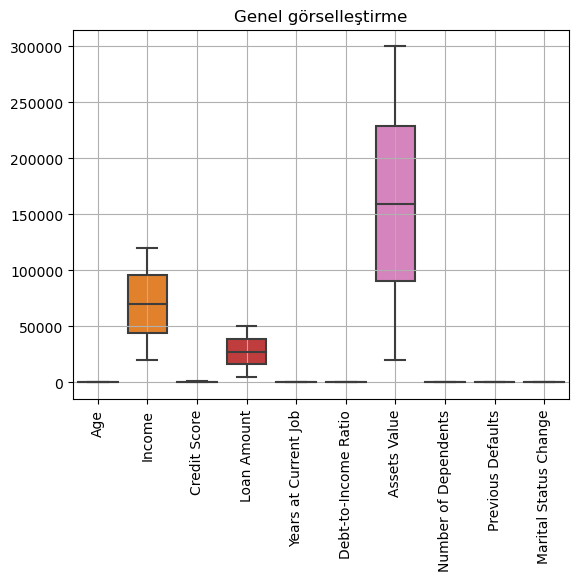

In [18]:
sns.boxplot(df);
plt.xticks(rotation = 90);
plt.grid(True)
plt.title("Genel görselleştirme");

##### 2. yaşa göre görselleştirme yapma.

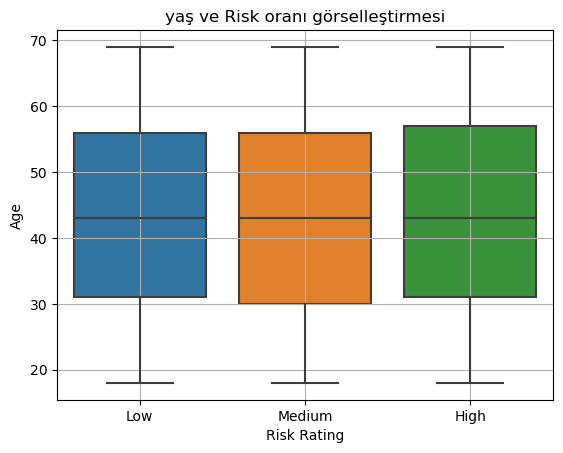

In [20]:
sns.boxplot(x = "Risk Rating", y = "Age", data = df);
plt.grid(True);
plt.title("yaş ve Risk oranı görselleştirmesi");

- Yaş ve risk yüzdesi görselleştirme.

1. Burda yorumlamaya açık veya alt kırılımları göre bir bir ipucu göremedim.

##### 3. Gelir ve kredi socoru gere görselleştirme yapılması.

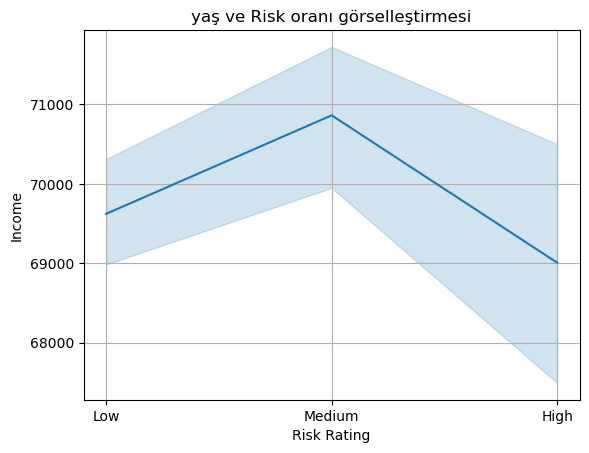

In [26]:
sns.lineplot(x = "Risk Rating", y = "Income", data = df);
plt.grid(True);
plt.title("gelir ve Risk oranı görselleştirmesi");  

- Burda ilginç bir grafik oluştu;

1. Burda gelir artaması ile kradi oranı linerr artmamış burda şunu söyleyebiliriz. 
2. Low gelir gurubu ile high kradi scoru benzer bir gelir oranı göstermekte.
3. Burda ilginçlik biraz daha artan yer Medium risk Rating bu durum daha yüksek gelir durubunda gösterilmekte.

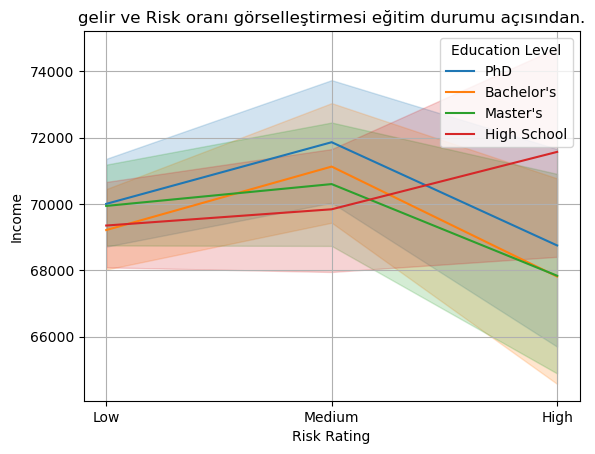

In [34]:
# Eğitim durumlarından bakalım.

sns.lineplot(x = "Risk Rating", y = "Income", hue = "Education Level", data = df);
plt.grid(True);
plt.title("gelir ve Risk oranı görselleştirmesi eğitim durumu açısından.");  

- Burda ilgiç bir durum var.

1. Düşük ve orta risk durumu benzerlik gösteriyor.
2. Yüksek risk durumunda ise High School eğitim seviyesi ise yüksek risk gösteriyor.

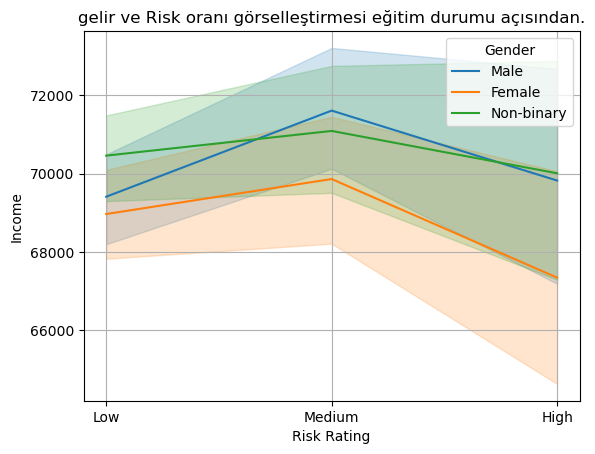

In [35]:
# Cinsiyet durumlarından bakalım.

sns.lineplot(x = "Risk Rating", y = "Income", hue = "Gender", data = df);
plt.grid(True);
plt.title("gelir ve Risk oranı görselleştirmesi eğitim durumu açısından.");  

- Burda cinsiyet acısından yorum yapalım.

1. Low risk açısından kadınlar daha az kazanıyor erkeklere göre.
2. Medium risk ratin acısından ise kadınalar yine daha az kazanıyor.
3. Yüksek risk durumunda kadınalar daha az kazanıyor. 
4. Düşük riskde insanlar orta seviyedeki insanlardan daha az kazanıyor.
5. Yüksek risk oranına sahip insanlar düşür risk gösteren insanlarla benzer gelir durumuna benzerlik ama risk durumları daha yüksek.
6. Yüsek riskte kadınlar örenklemin en az kazananı bunuda görüyoruz.

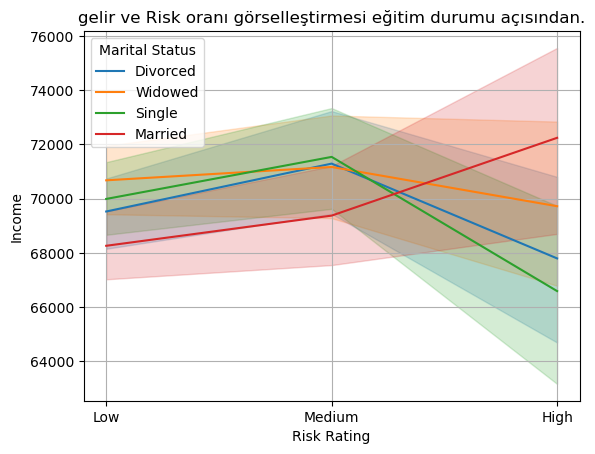

In [37]:
#Evli ve bekar olma durumlarından bakalım.

sns.lineplot(x = "Risk Rating", y = "Income", hue = "Marital Status", data = df);
plt.grid(True);
plt.title("gelir ve Risk oranı görselleştirmesi eğitim durumu açısından.");  

- Kişilerin medeni hali açısından bakalım.

1. Yüksek risk gösteren kişilerin gelir durumu yüksek olmasına rağmen yüksek risk gösteriyor.
2. ortalama risk gösteren kişilerin evli olanların risk oranı kazanımı gösteriyor buda yüksek riskin tam tersi.
3. düşük riskte düşük risk gösterenler yine evliler. 
4. Burda risk durumu deşkenliği az olan kişiler genelde tek yaşayanların.

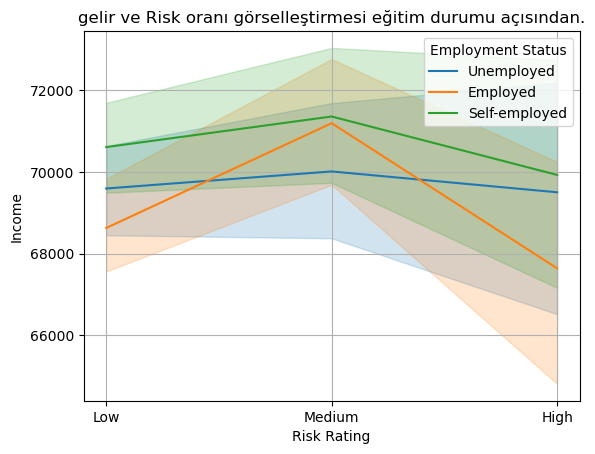

In [38]:
#Çalışma durumu üzerinde durumlarından bakalım.

sns.lineplot(x = "Risk Rating", y = "Income", hue = "Employment Status", data = df);
plt.grid(True);
plt.title("gelir ve Risk oranı görselleştirmesi eğitim durumu açısından.");  

- çalışma durumu üzerinden inceleme.

1. Düşük risk gösteren kişiler çalışan kişiler bu beklediğimiz bir sonuç.
2. Yuksek risktev ise en düşük riske sahip olanlar yine çalışanlar.
3. Burda en az değişkenlikler ise çalışmayan kişiler.

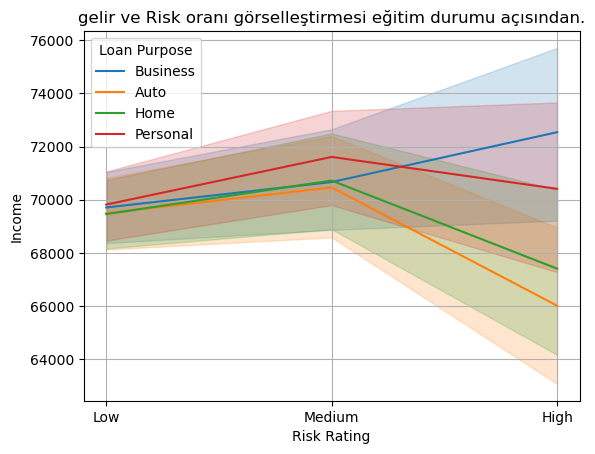

In [39]:
# Kredi kullanma üzerine bakalım.

sns.lineplot(x = "Risk Rating", y = "Income", hue = "Loan Purpose", data = df);
plt.grid(True);
plt.title("gelir ve Risk oranı görselleştirmesi eğitim durumu açısından."); 

- Krediyi kullanma durumlarına bakalım.

1. yüksek oranında en düşük oran araç için iken en yüksek oran ise iş için görünüyor.
2. Ev ve kişisel durumlar için ise yüksek riske sahip kişiler ise daha ortalama kalıyor.

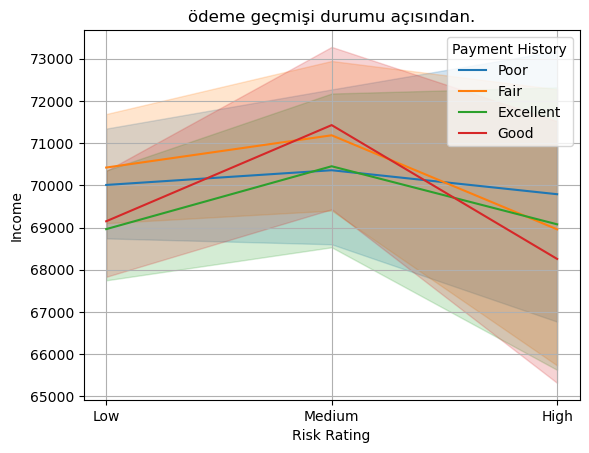

In [41]:
# Ödemi geçmişi acısından

sns.lineplot(x = "Risk Rating", y = "Income", hue = "Payment History", data = df);
plt.grid(True);
plt.title("ödeme geçmişi durumu açısından."); 

- Ödeme geçmişi göre ele alalım.

1. Yüksek riske sahip kişilerin ödeme geçmişi iyi olanların daha düşük şekilde scoru.
2. Kradi risk durumu düşük olan kişilerin kötü olanların aslında kredi scoru aslında diğer ödeme geçmişine göre daha yüksek bunu gözlemliyorum.

##### 4. ülke dağılşıma göre.

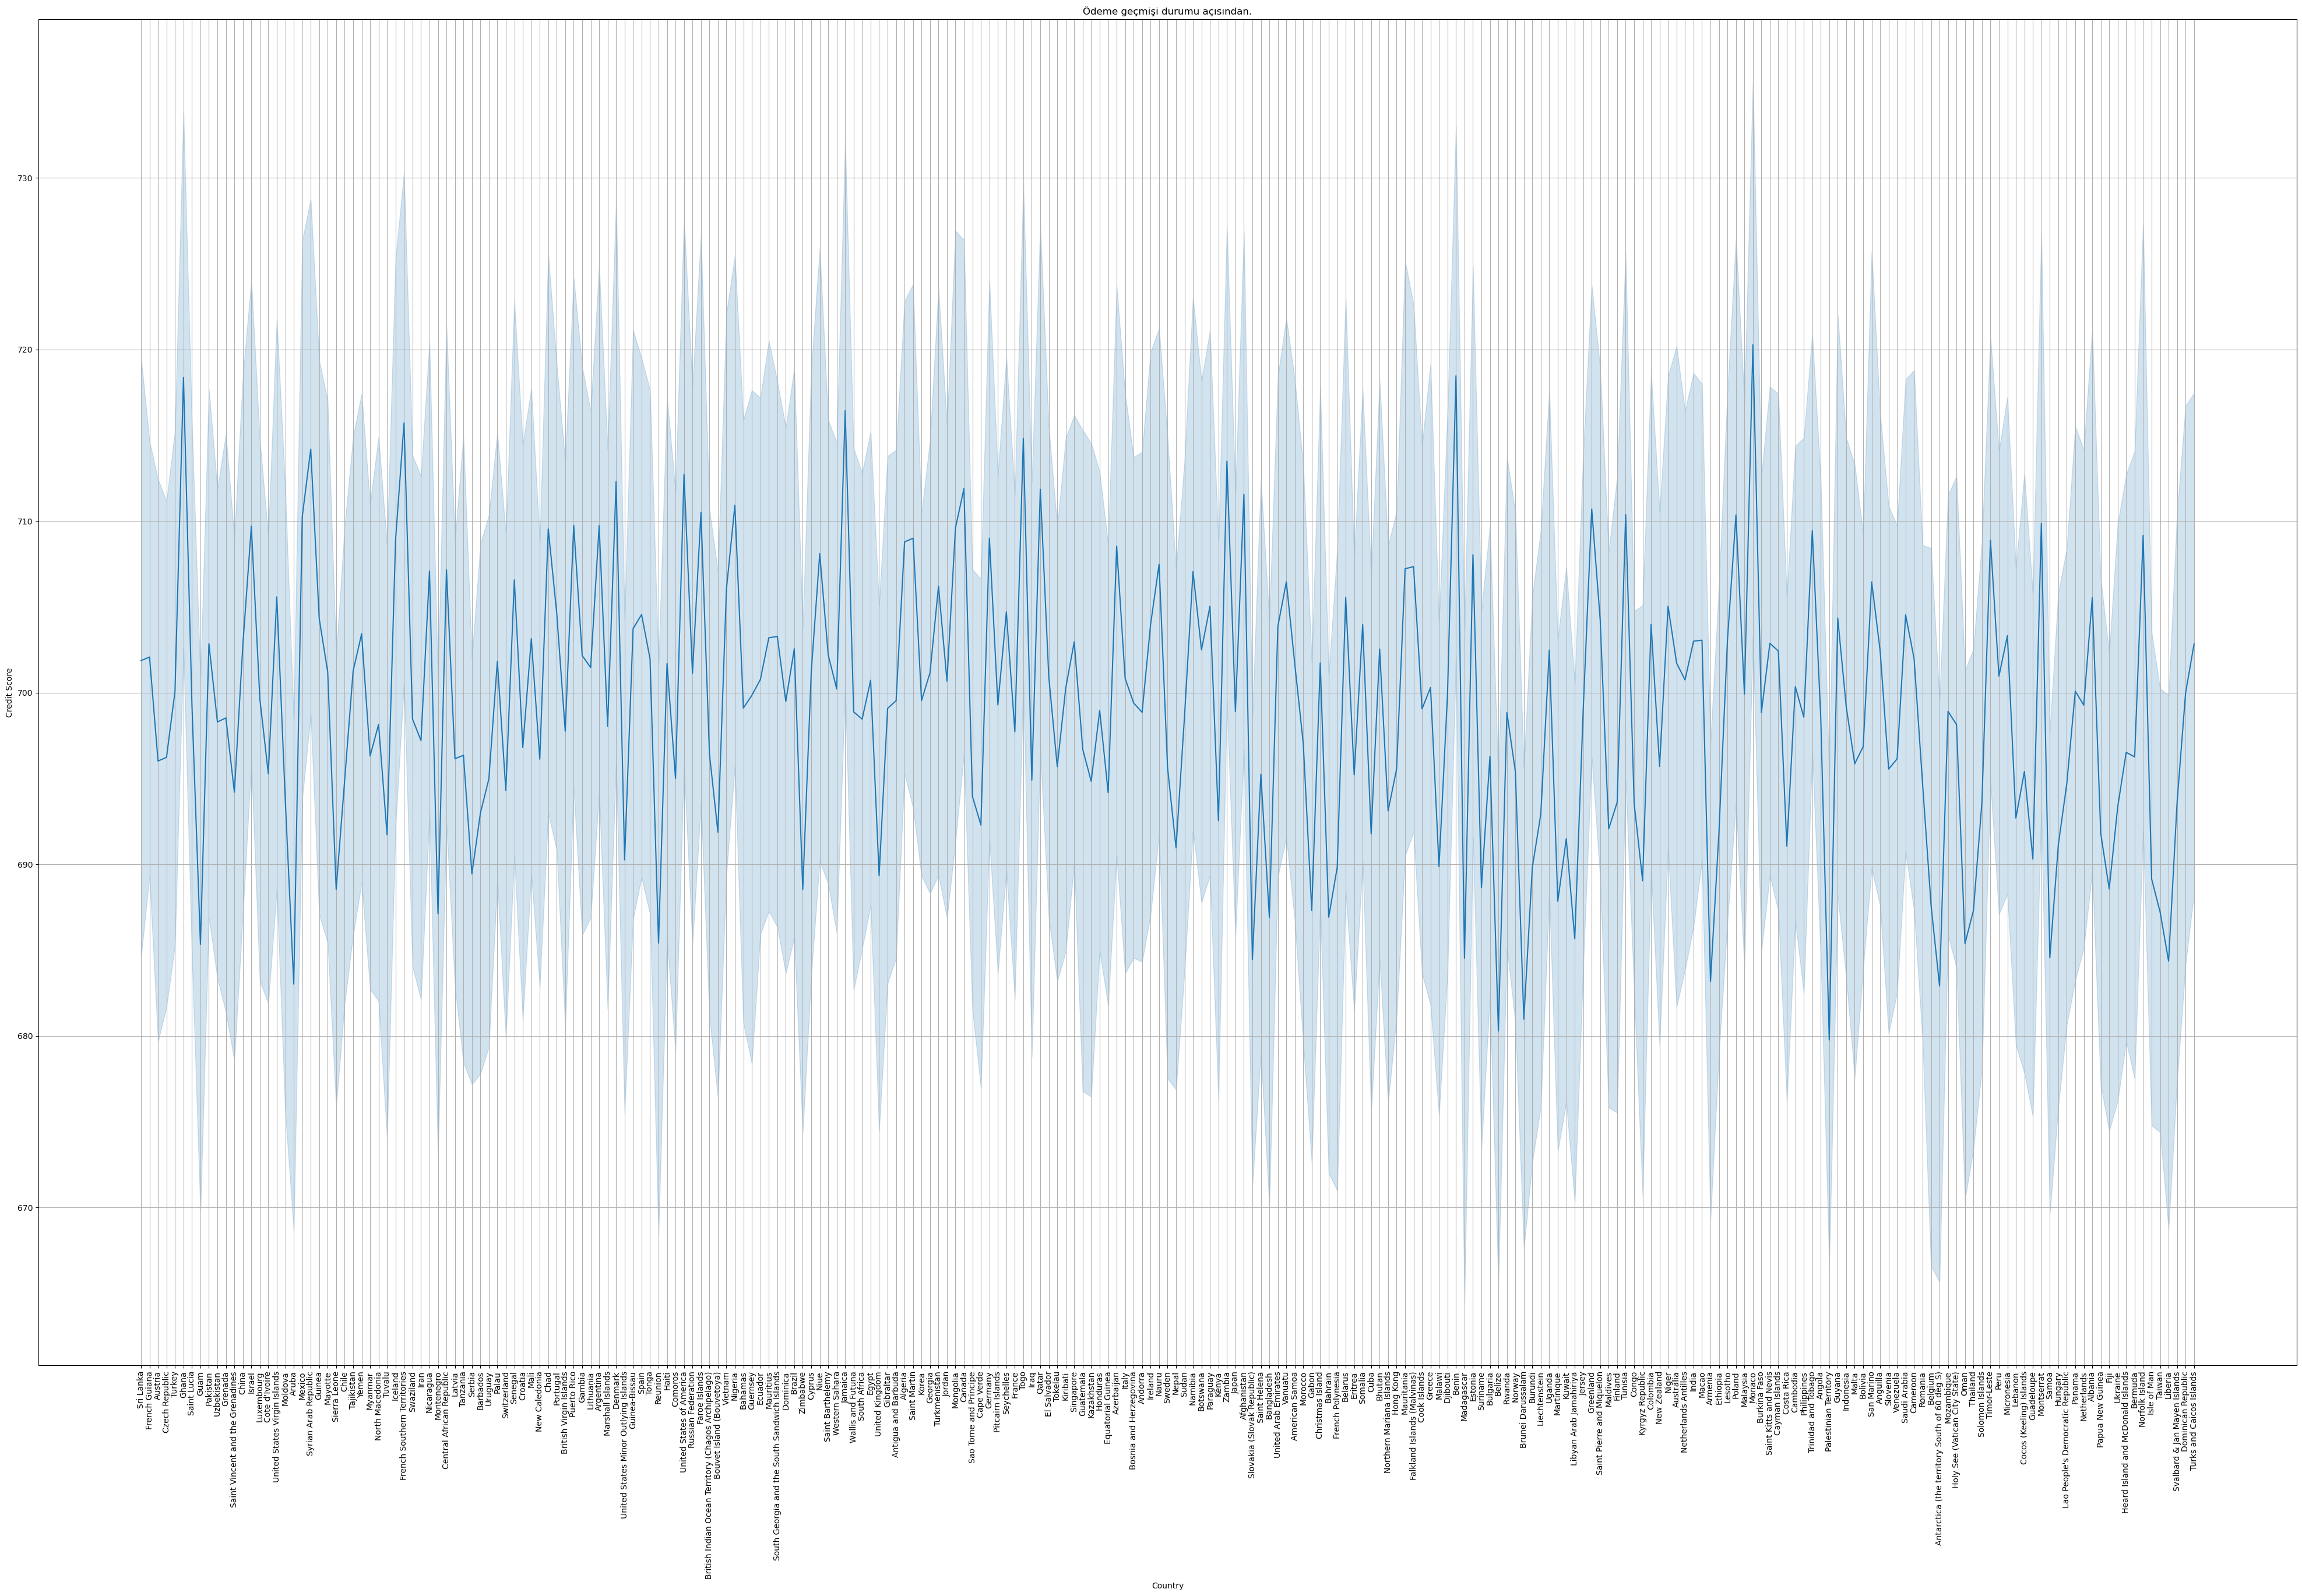

In [63]:
# 'df' verisini 'Credit Score' sütununa göre yüksekten düşüğe doğru sıralama
df_sorted = df.sort_values(by="Credit Score", ascending=False)

plt.figure(figsize=(50, 30))
sns.lineplot(x=df_sorted["Country"], y=df_sorted["Credit Score"])
plt.grid(True)
plt.xticks(rotation=90)
plt.title("Ödeme geçmişi durumu açısından.")

plt.savefig("output_plot.png")

##### 5. Sadece eğitim acısından bakalım.

Text(0.5, 1.0, 'eğitim durumu açısından.')

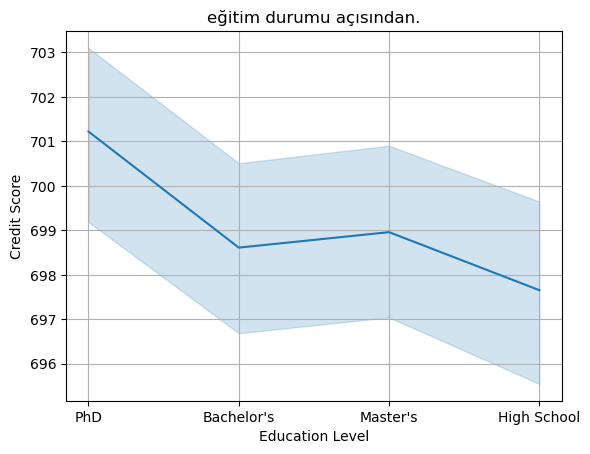

In [9]:
sns.lineplot(x= "Education Level", y= "Credit Score", data = df);
plt.grid(True)
plt.title("eğitim durumu açısından.")

- Sadece eğitim acısından bakalım.

1. Burda eğitim artığında genel olarak eğitim artınca scorda artmış.

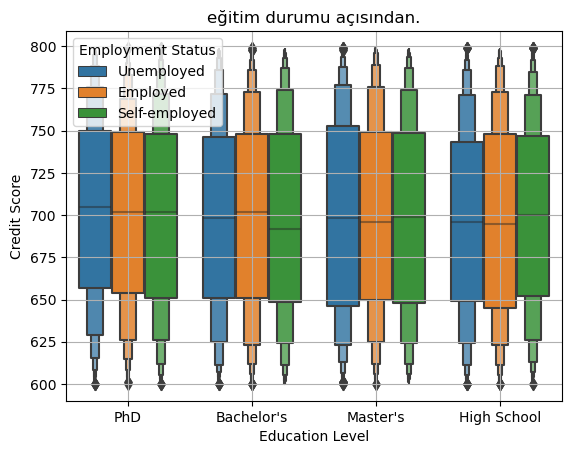

In [75]:
# Eğitim alanında alt kırılıma bakalım ve iş pozisyonu açısından bakalım

sns.boxenplot(x= "Education Level", y= "Credit Score", hue = "Employment Status", data = df);
plt.grid(True);
plt.title("eğitim durumu açısından.");

- Eğitim ve çalışma durumu açısından bakalım.

1. Phd seviyesinde eğitimi olanlar ve çalışmayan kişilerin kredi skoru yüksek görünmekte.
2. Standart sapması yüksek olanlar master yapmış ve çalışmayan kişiler.

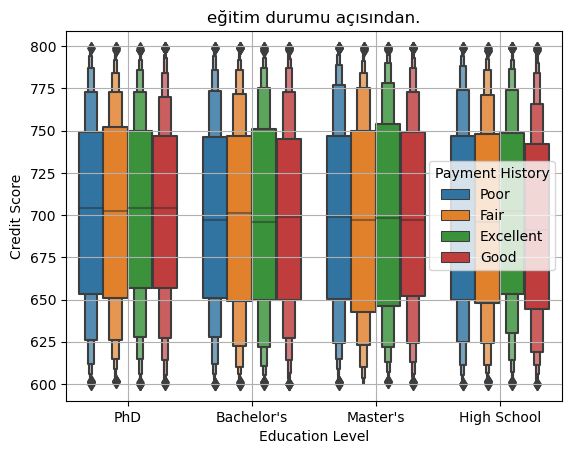

In [76]:
# Eğitim ve ödeme geçmişi acısından bakalım.

sns.boxenplot(x= "Education Level", y= "Credit Score", hue = "Payment History", data = df);
plt.grid(True);
plt.title("eğitim durumu açısından.");

- eğitim ve ödeme geçmiş acısından bakalım.

1. Phd yapan ve good ve excellent acısından bakıtığımız kesim en yüksek scora sahip.
2. En düşük olan ise lise ve iyi odeme geçmişi olanlar burası garip.

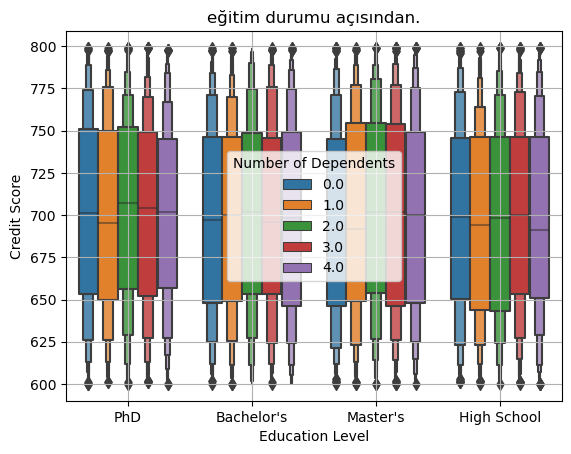

In [8]:
# eğitim ve departman numarası açısından inceledik.

sns.boxenplot(x= "Education Level", y= "Credit Score", hue = "Number of Dependents", data = df);
plt.grid(True);
plt.title("eğitim durumu açısından.");

##### 6. Kredi Amacı acısından görselleştirme.

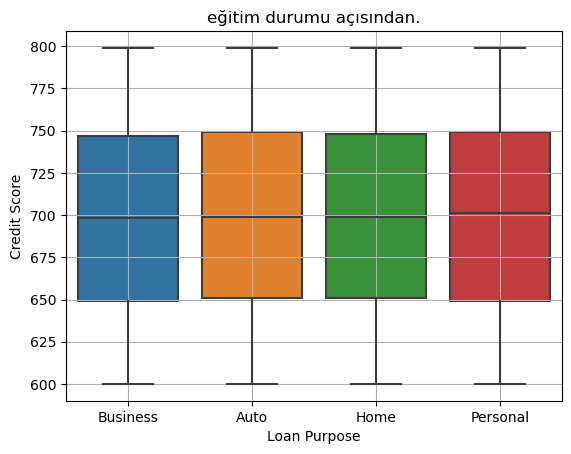

In [30]:
sns.boxplot(x= "Loan Purpose", y= "Credit Score", data = df);
plt.grid(True);
plt.title("Krdedi kullanım amacı acısından.");

- Acıkcası burdan yorumlayacak bir durum göremedim. 

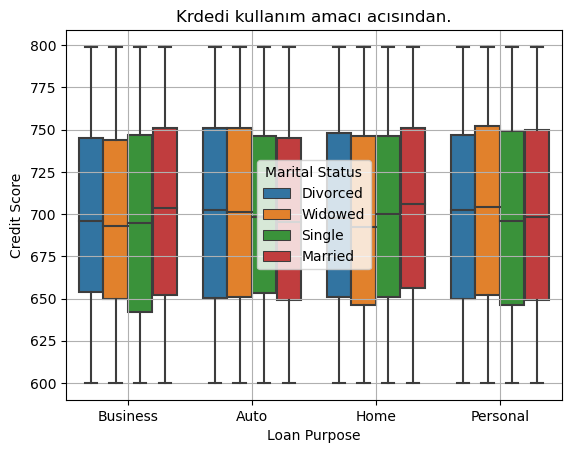

In [33]:
# Birde medeni hal acısından kırılımına bakalım.

sns.boxplot(x= "Loan Purpose", y= "Credit Score", hue = "Marital Status", data = df);
plt.grid(True);
plt.title("Krdedi kullanım amacı acısından.");

- Kredi kullanımı acısından ve medeni hal durumundan bakalım.

1. İş yapma acısından en fazla kullananlar evliler.
2. Araç için başvuranların çoğunluğu genelde boşanmiş kişiler oluyor.
3. Ev için kullananlar en fazla evli kişiler oluyor.

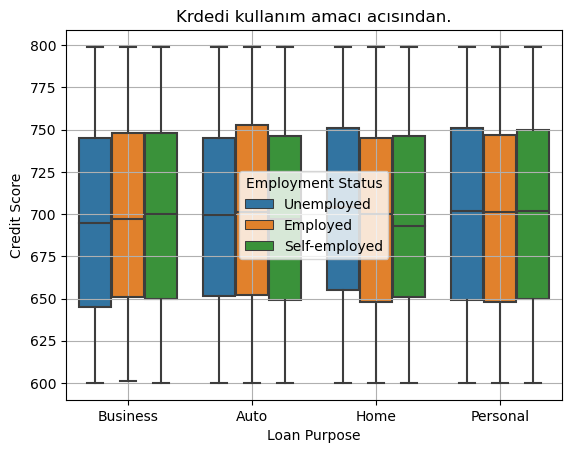

In [35]:
# Kişilrin iş sahibi olup olmaması açısndan.

sns.boxplot(x= "Loan Purpose", y= "Credit Score", hue = "Employment Status", data = df);
plt.grid(True);
plt.title("Krdedi kullanım amacı acısından.");

- Şimdi kradi kullanıma nedeni ve kişilerin iş durumu acısından bakalım.

1. Krediyi iş amaçıyla kullanmak istiyenlerin en fazla olanları kendi işlerini kullananlar.
2. Araç için kredi başvuranların büyük çoğunluğu çalışanlar.
3. Ev için başvuranların en fazla olanları çalışmayan kişiler.
4. Kişisel kullanım için yorumlayacak bir değerde bir fark göremedim.

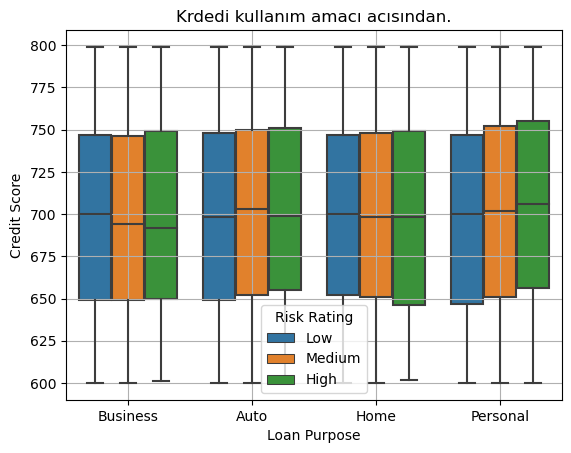

In [36]:
# Kredi kullanım nedenini risk değeri açısından bakalım.

sns.boxplot(x= "Loan Purpose", y= "Credit Score", hue = "Risk Rating", data = df);
plt.grid(True);
plt.title("Krdedi kullanım amacı acısından.");

- Kredi kulanım acısından bakarsak ve kredi risk reytingi acısından bakalım.

1. İş için kredi kullanma başvuranların risk scoru yüksek oluyor.
2. Araç için kullananların için yorumlamaya değer bir fark göremedim.
3. Home için kredi başvurusu yapanların risk scorları açısından yorumlamaya değer bir fark göremedim.
4. Kişisel kullanım açısından kredi başvuru yapanların en yüksek oran yüksek risk oranı acısından daha yüksek.

##### 7. Kredi kullanım nedeni acısından bakalım. (Loan Purpose)

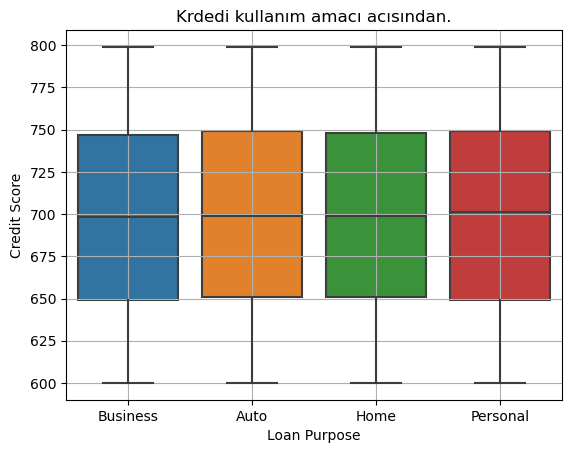

In [37]:
sns.boxplot(x= "Loan Purpose", y= "Credit Score", data = df);
plt.grid(True);
plt.title("Krdedi kullanım amacı acısından.");

- Burda yorumlamaya değecek bir fark göremedim acıkcası.

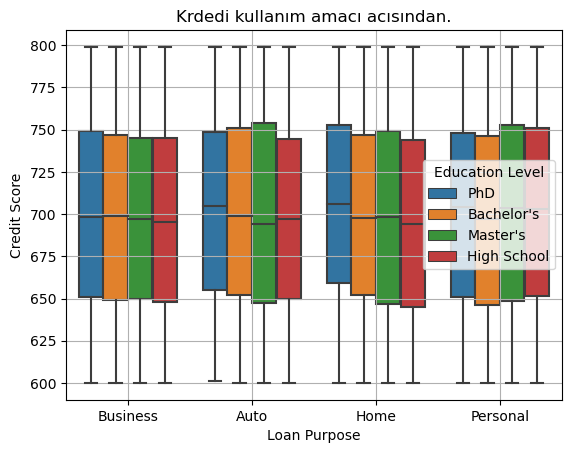

In [40]:
# Kredi kullanım nedeni acısından kişilerin eğitim durumlarına bakalım.

sns.boxplot(x= "Loan Purpose", y= "Credit Score", hue = "Education Level", data = df);
plt.grid(True);
plt.title("Krdedi kullanım amacı acısından.");

- Kişilerin kradi başvurma ve eğitim durumu acısından bakalım.

1. İş için kredi başvuranların ve phd eğitim durumlarına sahip kişilerin kredi scoru daha yüksek.
2. Araç için başvuranların. eğitm durumu acısından baktığımızda master yapanların scoru daha düşük.
3. Ev için başvuranların en yüksek scorları phd eğitim durumları acısından en yüksek scorlara sahip.
4. Kişisel kullnaım için eğitim durumu acıosından ayırt edici bir fark yok.

### Medel kurma

##### 1. Model kurma:

In [17]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Boş değerlere sahip sütunları çıkar
df_cleaned = df.drop(columns=['Income', 'Loan Amount', 'Assets Value', 'Number of Dependents', 'Previous Defaults'])

# Hedef değişken ve bağımsız değişkenleri ayır
X = df_cleaned.drop(columns=['Credit Score'])
y = df_cleaned['Credit Score']

# Kategorik verileri dummies olarak çevirelim
X = pd.get_dummies(X, drop_first=True)

# Veride herhangi bir NaN değeri olup olmadığını kontrol et ve temizle
if X.isnull().sum().sum() > 0 or y.isnull().sum() > 0:
    X = X.fillna(X.mean())
    y = y.fillna(y.mean())

# Veriyi eğitim ve test olarak böl
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veriyi ölçeklendir
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Yapay Sinir Ağı modelini oluştur
model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1))  # Çıkış katmanı, hedef sayısal bir değer olduğundan aktivasyon fonksiyonu yok

# Modeli derle
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # Öğrenme oranını düşürdük
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Early Stopping callback'i oluştur
early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

# Modeli eğit
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2, callbacks=[early_stopping])

# Modeli değerlendir
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

Epoch 1/100
960/960 [==============================] - 16s 16ms/step - loss: 346430.3750 - val_loss: 314080.9375
Epoch 2/100
960/960 [==============================] - 15s 16ms/step - loss: 217184.4219 - val_loss: 212058.5312
Epoch 3/100
960/960 [==============================] - 15s 16ms/step - loss: 84641.9766 - val_loss: 79587.5703
Epoch 4/100
960/960 [==============================] - 15s 16ms/step - loss: 22123.9453 - val_loss: 33558.9688
Epoch 5/100
960/960 [==============================] - 16s 16ms/step - loss: 7160.6133 - val_loss: 18473.2031
Epoch 6/100
960/960 [==============================] - 15s 16ms/step - loss: 3910.8250 - val_loss: 14353.2529
Epoch 7/100
960/960 [==============================] - 15s 16ms/step - loss: 3432.4497 - val_loss: 14019.7686
Epoch 8/100
960/960 [==============================] - 15s 16ms/step - loss: 3045.0007 - val_loss: 13497.8066
Epoch 9/100
960/960 [==============================] - 15s 16ms/step - loss: 2785.9126 - val_loss: 12432.7412
Ep

In [39]:
# Model yapısına bakalım.

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 256)               2799616   
                                                                 
 dense_16 (Dense)            (None, 128)               32896     
                                                                 
 dense_17 (Dense)            (None, 1)                 129       
                                                                 
Total params: 2832641 (10.81 MB)
Trainable params: 2832641 (10.81 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##### 2. MOdelin üzerinde tahmin yapma.

In [24]:
# Rastgele bir veri seç ve tahmin et
random_index = np.random.randint(0, X_test.shape[0])
random_sample = X_test[random_index].reshape(1, -1)
predicted_credit_score = model.predict(random_sample)
actual_credit_score = y_test.iloc[random_index]

print(f'Tahmin Edilen Kredi Skoru: {predicted_credit_score[0][0]}')
print(f'Gerçek Kredi Skoru: {actual_credit_score}')

1/1 [==============================] - 0s 14ms/step
Tahmin Edilen Kredi Skoru: 658.2868041992188
Gerçek Kredi Skoru: 628.0


##### 3. Modelin sonuçlarını görselleştirme.

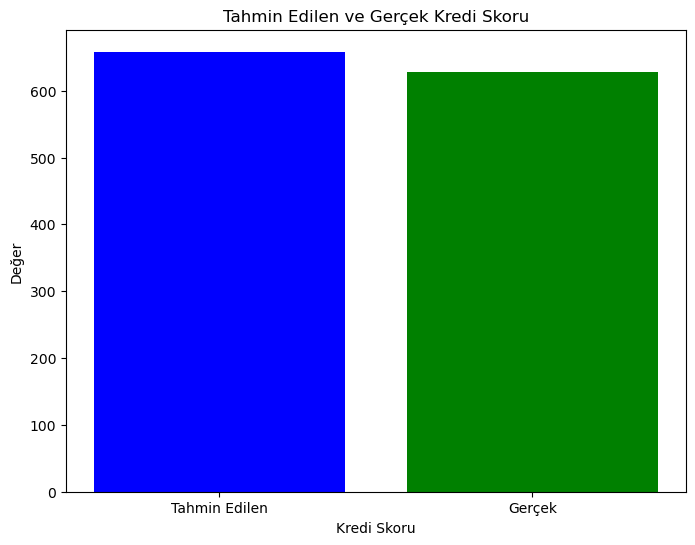

In [25]:
# Grafik ile göster
plt.figure(figsize=(8, 6))
plt.bar(['Tahmin Edilen', 'Gerçek'], [predicted_credit_score[0][0], actual_credit_score], color=['blue', 'green'])
plt.xlabel('Kredi Skoru')
plt.ylabel('Değer')
plt.title('Tahmin Edilen ve Gerçek Kredi Skoru')
plt.show()

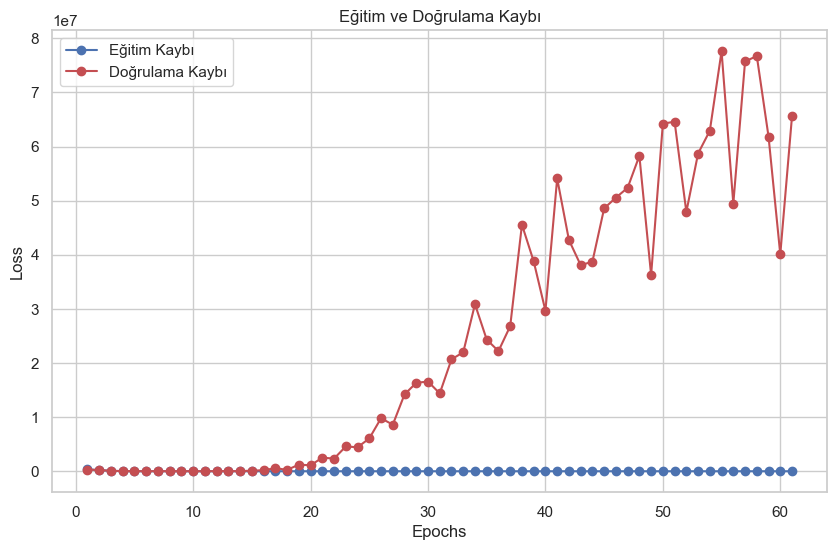

In [54]:
# Eğitim ve doğrulama kayıplarını elde et
history_dict = history.history
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(train_loss) + 1)

# Eğitim ve doğrulama kayıplarını çiz
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'bo-', label='Eğitim Kaybı')
plt.plot(epochs, val_loss, 'ro-', label='Doğrulama Kaybı')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

##### 4. Model sonuçlarını kaydetmesi

In [26]:
# Modeli kaydet
model.save('credit_score_model.h5')

# Scaler'ı kaydet
import joblib
joblib.dump(scaler, 'scaler.pkl')

C:\Users\realb\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


['scaler.pkl']

##### 5. Modelin sonuçlarını üzerinden kişiler ile etkileşim ile modele tahmin ettirme.

In [34]:
import tkinter as tk
from tkinter import ttk
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
import joblib

In [27]:
# Modeli ve scaler'ı yükle
model = load_model('credit_score_model.h5')
scaler = joblib.load('scaler.pkl')

# Özellik isimlerini yükle
features = ['Age', 'Gender', 'Education Level', 'Marital Status', 'Loan Purpose', 'Employment Status', 
            'Years at Current Job', 'Payment History', 'Debt-to-Income Ratio', 'City', 'State', 'Country', 
            'Marital Status Change', 'Risk Rating']

# Kategorik değişkenler için seçenekler
categorical_options = {
    'Gender': ['Male', 'Female'],
    'Education Level': ['High School', 'Bachelor', 'Master', 'PhD'],
    'Marital Status': ['Single', 'Married', 'Divorced', 'Widowed'],
    'Loan Purpose': ['Personal', 'Education', 'Home Improvement', 'Business'],
    'Employment Status': ['Employed', 'Self-employed', 'Unemployed', 'Retired'],
    'City': ['City1', 'City2', 'City3'],
    'State': ['State1', 'State2', 'State3'],
    'Country': ['Country1', 'Country2', 'Country3'],
    'Marital Status Change': ['No Change', 'Recently Married', 'Recently Divorced'],
}

# Tkinter GUI
class CreditScoreApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Kredi Skoru Tahmin Uygulaması")
        self.entries = {}

        mainframe = ttk.Frame(root, padding="10 10 20 20")
        mainframe.grid(column=0, row=0, sticky=(tk.W, tk.E, tk.N, tk.S))

        ttk.Label(mainframe, text="Kullanıcı Bilgilerini Giriniz:").grid(column=1, row=0, columnspan=2)

        row = 1
        for feature in features:
            ttk.Label(mainframe, text=feature).grid(column=1, row=row, sticky=tk.W)
            if feature in categorical_options:
                self.entries[feature] = ttk.Combobox(mainframe, values=categorical_options[feature])
            else:
                self.entries[feature] = ttk.Entry(mainframe)
            self.entries[feature].grid(column=2, row=row, sticky=(tk.W, tk.E))
            row += 1

        self.result = tk.StringVar()
        ttk.Label(mainframe, text="Tahmin Edilen Kredi Skoru:").grid(column=1, row=row, sticky=tk.W)
        ttk.Label(mainframe, textvariable=self.result).grid(column=2, row=row, sticky=(tk.W, tk.E))

        ttk.Button(mainframe, text="Tahmin Et", command=self.predict_credit_score).grid(column=2, row=row+1, sticky=tk.E)

        for child in mainframe.winfo_children(): 
            child.grid_configure(padx=5, pady=5)

    def predict_credit_score(self):
        input_data = []
        for feature in features:
            value = self.entries[feature].get()
            if value in categorical_options.get(feature, []):
                input_data.append(value)
            else:
                try:
                    input_data.append(float(value))
                except ValueError:
                    input_data.append(0.0)

        # DataFrame oluştur ve dummies uygula
        input_df = pd.DataFrame([input_data], columns=features)
        input_df = pd.get_dummies(input_df).reindex(columns=X.columns, fill_value=0)
        
        # Veriyi ölçeklendir
        input_scaled = scaler.transform(input_df)

        # Tahmin yap
        prediction = model.predict(input_scaled)[0][0]
        self.result.set(f"{prediction:.2f}")

if __name__ == "__main__":
    root = tk.Tk()
    app = CreditScoreApp(root)
    root.mainloop()

1/1 [==============================] - 0s 39ms/step


### Sonuçlar:



## Veri Görselleştirme
- **Veriyi genel görselleştirme:** Veri setinin genel görünümünü, dağılımlarını ve ilişkilerini anlamak için grafikler oluşturduk.
- **Yaş durumuna göre veri görselleştirmesi yapma:** Farklı yaş gruplarındaki kişilerin kredi skorlarını ve diğer finansal bilgilerini analiz ettik.
- **Gelir durumuna göre veriyi görselleştirme:** Farklı gelir seviyelerindeki kişilerin kredi skorlarını ve diğer finansal bilgilerini görselleştirdik.
- **Ülkelerin genel durumuna göre dağılım:** Veri setindeki farklı ülkelerdeki kişilerin finansal durumlarını ve kredi skorlarını analiz ettik.
- **Eğitim açısından veri görselleştirme yapma:** Eğitim seviyelerine göre kredi skorlarının dağılımını inceledik.

## Model Kurma
- **Model kurma:** Yapay sinir ağı kullanarak bir model oluşturduk ve veriyi bu modelle eğittik.
- **Modele tahmin yaptırma:** Modeli kullanarak yeni veri noktaları için kredi skorlarını tahmin ettik.
- **Modelin sonuçlarını görselleştirme:** Modelin tahmin ettiği kredi skorları ile gerçek kredi skorlarını karşılaştırarak modelin performansını görselleştirdik.
- **Modelin sonuçlarını kaydettirme:** Modeli ve eğitim sürecini kaydederek gelecekte tekrar kullanmak üzere sakladık.
- **Kullanıcıdan alınan bilgilerle kredi skoru tahmin etme:** Kullanıcıdan alınan bilgileri kullanarak kredi skorunu tahmin eden interaktif bir Tkinter uygulaması geliştirdik.

## Genel Sonuçlar
- **Eğitim ve Gelir Durumu:** Eğitim seviyesi ve gelir durumu, kredi skorunu önemli ölçüde etkileyen faktörler olarak belirlendi. Daha yüksek eğitim seviyesine ve gelire sahip bireylerin genellikle daha yüksek kredi skorlarına sahip olduğu görüldü.
- **Ödeme Geçmişi:** Ödeme geçmişi, kredi skorunu en çok etkileyen faktörlerden biri olarak belirlendi. Düzenli ödeme yapan bireylerin kredi skorlarının daha yüksek olduğu tespit edildi.
- **Cinsiyet Farklılıkları:** Kadınların kredi skorlarının genel olarak erkeklerden daha düşük olduğu gözlemlendi. Bu durumun, kadınların daha düşük gelir seviyelerine sahip olma eğilimi ve finansal piyasada daha az temsil edilmeleri gibi çeşitli sosyo-ekonomik faktörlerden kaynaklanabileceği değerlendirildi.

## Proje Adımları ve Elde Edilen Sonuçların Genel Açıklaması
Bu proje kapsamında, kredi skorunu tahmin etmek için çeşitli veri analizleri ve makine öğrenimi teknikleri uyguladık. Veriyi analiz edip görselleştirerek, önemli özellikleri ve bu özelliklerin kredi skoru üzerindeki etkilerini belirledik. Daha sonra, yapay sinir ağı kullanarak bir model oluşturduk ve bu modelle kredi skorlarını başarılı bir şekilde tahmin ettik. Son olarak, kullanıcıdan alınan bilgileri kullanarak kredi skorunu tahmin eden interaktif bir uygulama geliştirdik. Bu süreçte elde edilen sonuçlar, eğitim, gelir durumu ve ödeme geçmişinin kredi skoru üzerinde önemli bir etkiye sahip olduğunu, ayrıca kadınların kredi skorlarının erkeklere göre genellikle daha düşük olduğunu ortaya koydu. Bu bulgular, kredi değerlendirme süreçlerinde dikkate alınması gereken önemli faktörlerdir.
